In [146]:
# Import libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [147]:
# Import Data.
expert1 = pd.read_csv("dataset/expert_4321_data.csv")
expert2 = pd.read_csv("dataset/expert_4376_data.csv")
expert3 = pd.read_csv("dataset/expert_5874_data.csv")

In [148]:
def generateReturns(data):
    exp1 = data[data.direction == "out"]["balance"].to_frame()
    exp1["trade_returns"] = round((1 - (exp1["balance"].shift(1) / exp1["balance"])), ) * 100
    return exp1

In [173]:
def plotReturns(data, name, color):
    res = generateReturns(data)
    plt.title("Trades Returns " + name)
    plt.xlabel("Returns")
    plt.ylabel("Frequency")
    #res["trade_returns"].hist(bins = 10, color = color)
    res["trade_returns"].plot("kde", color = color)

In [174]:
# Returns DataFrame.
exp1 = generateReturns(expert1)
exp2 = generateReturns(expert2)
exp3 = generateReturns(expert3)

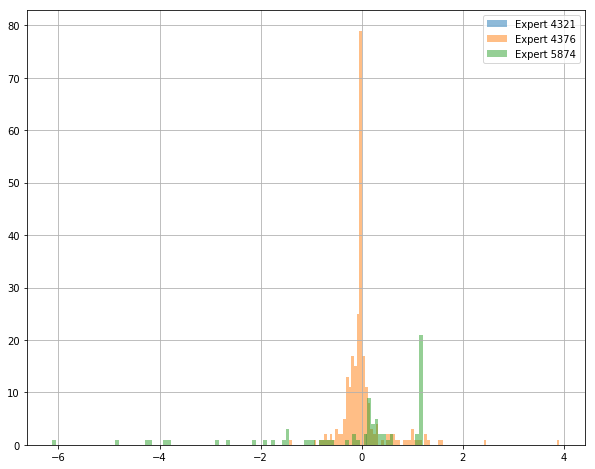

In [175]:
# Plot returns.
exp1["trade_returns"].hist(bins = 100, label = "Expert 4321", figsize = (10, 8), alpha = 0.5)
exp2["trade_returns"].hist(bins = 100, label = "Expert 4376", alpha = 0.5)
exp3["trade_returns"].hist(bins = 100, label = "Expert 5874", alpha = 0.5)
plt.legend()

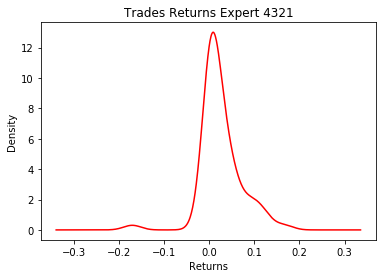

In [176]:
plotReturns(expert1, "Expert 4321", "r")

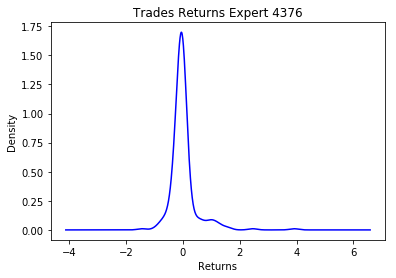

In [177]:
plotReturns(expert2, "Expert 4376", "b")

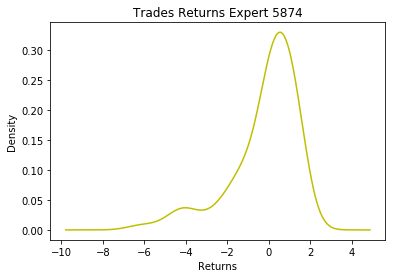

In [178]:
plotReturns(expert3, "Expert 5874", "y")

In [155]:
# Comparing Daily Returns between trading strategies.

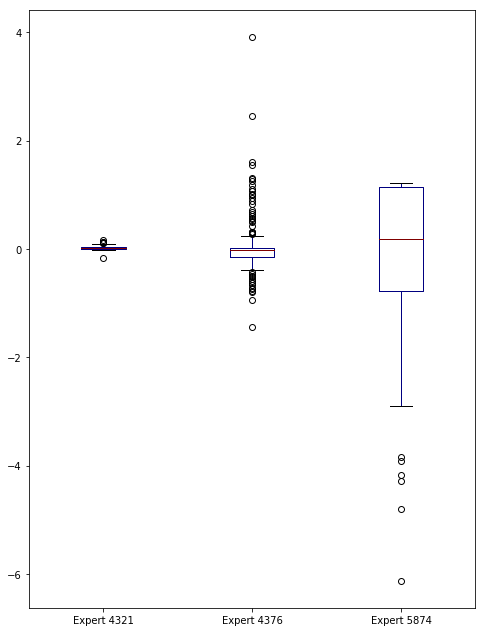

In [156]:
box_df = pd.concat([exp1["trade_returns"], exp2["trade_returns"], exp3["trade_returns"]], axis = 1)
#box_df = box_df[0: 69]
box_df.columns = (["Expert 4321", "Expert 4376", "Expert 5874"])
box_df.plot(figsize = (8, 11), kind = "box", colormap = "jet")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020A658260B8>,
      dtype=object)

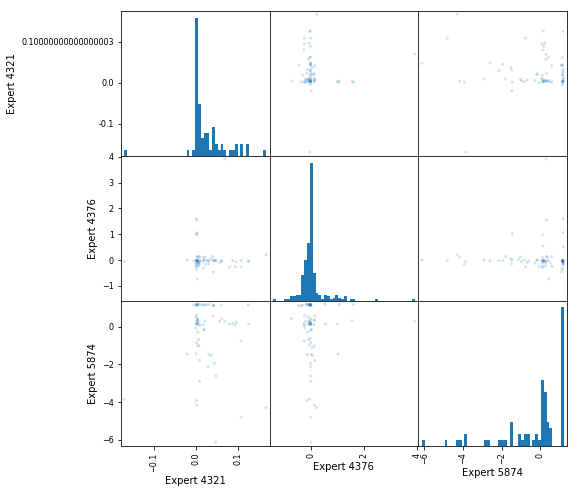

In [157]:
# Correlation Matrix.
from pandas.plotting import scatter_matrix
scatter_matrix(box_df, figsize=(8,8), alpha = 0.2, hist_kwds={"bins": 50})

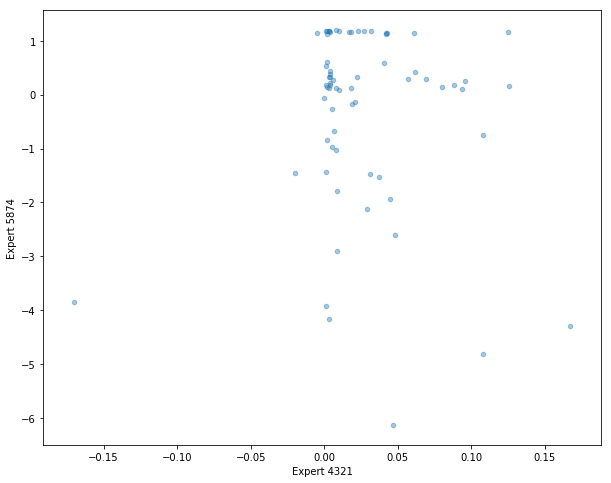

In [158]:
box_df.plot(kind = "scatter", x = "Expert 4321", y = "Expert 5874",  alpha = 0.4, figsize=(10,8))

In [159]:
# Cumulative returns.
exp1["cumulative_return"] = (1 + exp1["trade_returns"]).cumprod()
exp2["cumulative_return"] = (1 + exp2["trade_returns"]).cumprod()
exp3["cumulative_return"] = (1 + exp3["trade_returns"]).cumprod()

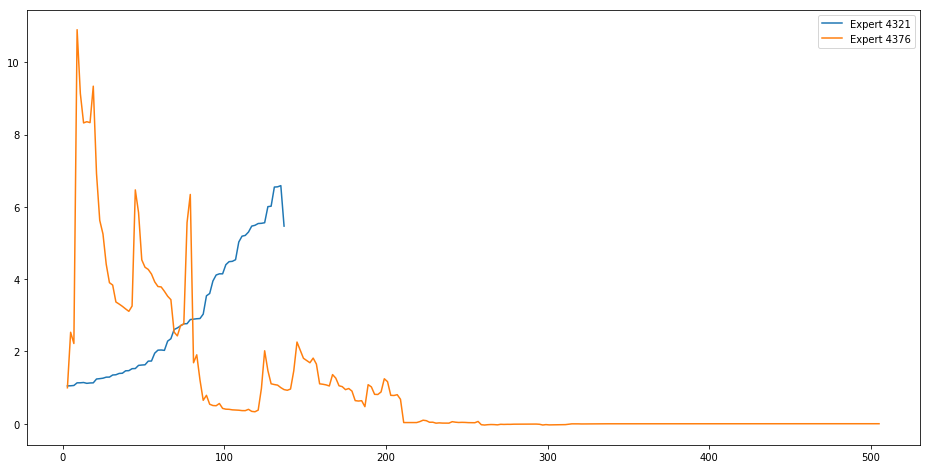

In [163]:
exp1["cumulative_return"].plot(label="Expert 4321", figsize=(16,8))
exp2["cumulative_return"].plot(label = "Expert 4376")
#exp3["cumulative_return"].plot(label = "Expert 5874")
plt.legend()

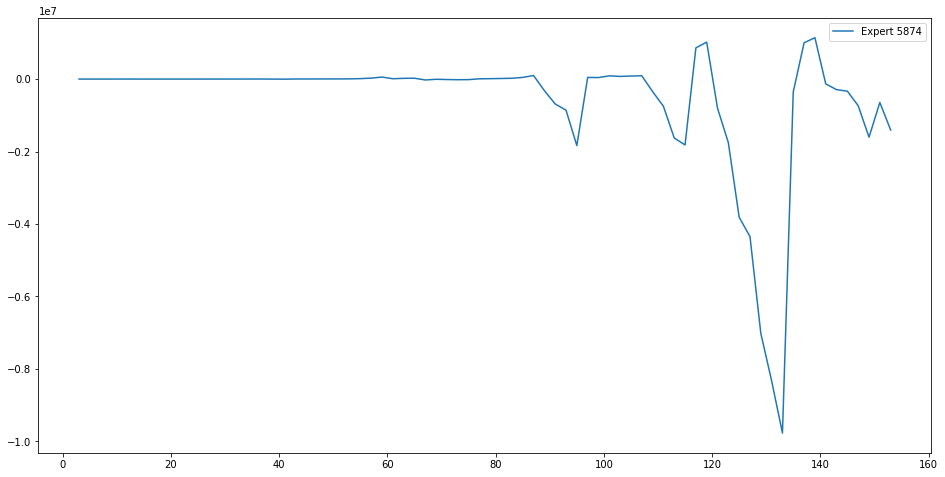

In [166]:
exp3["cumulative_return"].plot(label = "Expert 5874", figsize = (16,8))
plt.legend()